## Above Ground data and predicting data capacity

In [1]:
# load Library

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing


%matplotlib inline

In [2]:
GR_Sales_DF = pd.read_csv('C:Data/Gr_Sales_DF.csv',
                               sep=',',
                               header=0,
                               index_col=0,
                               )

In [4]:
import xgboost

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
          GR_Sales_DF.dropna().loc[:,'SalePrice'])

model.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
          GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.9759025677952752

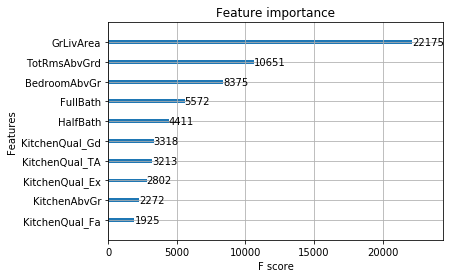

In [5]:
from xgboost import plot_importance
# plot feature importance
plot_importance(model)

## Compare with other models 

In [39]:
import xgboost

model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

model.fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1).loc[:,['GrLivArea', 'TotRmsAbvGrd',
                                                                'BedroomAbvGr', 'FullBath',
                                                                'HalfBath']],
          GR_Sales_DF.dropna().loc[:,'SalePrice'])

model.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1).loc[:,['GrLivArea','TotRmsAbvGrd',
                                                                  'BedroomAbvGr','FullBath',
                                                                  'HalfBath']],
          GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.9529774779738525

In [37]:
# First do a Linear Regression 

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1).loc[:,['GrLivArea', 'TotRmsAbvGrd',
                                                                                   'BedroomAbvGr', 'FullBath',
                                                                                   'HalfBath', 'KitchenQual_Gd',
                                                                                   'KitchenQual_TA', 'KitchenQual_Ex']],
                             GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
reg.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1).loc[:,['GrLivArea', 'TotRmsAbvGrd',
                                                                'BedroomAbvGr', 'FullBath',
                                                                'HalfBath', 'KitchenQual_Gd',
                                                                'KitchenQual_TA', 'KitchenQual_Ex']],
          GR_Sales_DF.dropna().loc[:,'SalePrice'])



0.6905206140171041

### Basic Linear Regression

In [7]:
# First do a Linear Regression 

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                             GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
reg.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
          GR_Sales_DF.dropna().loc[:,'SalePrice'])



0.7070681831069339

#### Quantile Transformation

In [8]:
# transform the distribution to analyse with a correlation matrix
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',
                                                         random_state=0)

# Trasform the DF to a array 
Lot_Array = GR_Sales_DF.dropna().drop('SalePrice', axis=1).values

# quatile trasnformation of the Lot values
Lot_Array = quantile_transformer.fit_transform(Lot_Array)

#Transform the Array in a DF
Lot_DF = pd.DataFrame(Lot_Array,
                      columns=GR_Sales_DF.dropna().drop('SalePrice', axis=1).columns)

# Linear Regression after quantiletrasnformer

reg_quant = LinearRegression().fit(Lot_DF,
                             GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
reg_quant.score(Lot_DF,
                GR_Sales_DF.dropna().loc[:,'SalePrice'])



0.6993400584069303

###### Small increase 

#### yeo-johnson transformation

In [9]:
# transform the distribution to analyse with a correlation matrix
pt = preprocessing.PowerTransformer(method='yeo-johnson',
                                    standardize=True)
# Trasform the DF to a array 
Lot_Array = GR_Sales_DF.dropna().drop('SalePrice', axis=1).values

# quatile trasnformation of the Lot values
Lot_Array = pt.fit_transform(Lot_Array)

#Transform the Array in a DF
Lot_DF = pd.DataFrame(Lot_Array,
                      columns=GR_Sales_DF.dropna().drop('SalePrice', axis=1).columns)

# Linear Regression after quantiletrasnformer

reg_yeo = LinearRegression().fit(Lot_DF,
                             GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
reg_yeo.score(Lot_DF,
              GR_Sales_DF.dropna().loc[:,'SalePrice'])



0.6930915496280732

### Ridge regression 

In [11]:
# First Ridge regression  

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                             GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
ridge.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
            GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.7070503771950558

In [12]:
# Ridge regression find best alpha 

from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e+2]).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                    GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
ridgeCV.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
              GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.707050377195055

### ridge with quant transformation

In [13]:
# transform the distribution to analyse with a correlation matrix
quantile_transformer = preprocessing.QuantileTransformer(output_distribution='normal',
                                                         random_state=0)

# Trasform the DF to a array 
Lot_Array = GR_Sales_DF.dropna().drop('SalePrice', axis=1).values

# quatile trasnformation of the Lot values
Lot_Array = quantile_transformer.fit_transform(Lot_Array)

#Transform the Array in a DF
Lot_DF = pd.DataFrame(Lot_Array,
                      columns=GR_Sales_DF.dropna().drop('SalePrice', axis=1).columns)

# Ridge CV 
ridgeCV_quant = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 1e+2],
                        gcv_mode='auto',
                        normalize=False,
                        scoring='r2').fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                    GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
ridgeCV_quant.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                    GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.7070681821272964

#### SGDRegressor model

In [14]:
# First Ridge regression  

from sklearn.linear_model import SGDRegressor
SGDReg = SGDRegressor(penalty='elasticnet',
                      alpha=0.01,
                      l1_ratio=0.25,
                      tol=1e-4,
                      random_state=1).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                          GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
SGDReg.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
            GR_Sales_DF.dropna().loc[:,'SalePrice'])

-1.9818919488400985e+20

### Well looks like it is not this one XD

In [12]:
# from sklearn.metrics import SCORERS

# sorted(SCORERS.keys())


### Elastic net

Basic elasti net

In [15]:
from sklearn.linear_model import ElasticNetCV

ElasticNetCv = ElasticNetCV(cv=5, random_state=0).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                      GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
ElasticNetCv.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.49735871031485895

### LarsCV

Basic LarsCV

In [16]:
from sklearn.linear_model import LarsCV

LarsCv = LarsCV(cv=5).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                      GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
LarsCv.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.7068292376864693

### LassoCV

Basic LassoCV

In [17]:
from sklearn.linear_model import LassoCV

LassoCV = LassoCV(cv=5).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                      GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
LassoCV.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.5020984354067771

### LassoLarsCV

Basic LassoLarsCV

In [18]:
from sklearn.linear_model import LassoLarsCV

LassoLarsCV = LassoLarsCV(cv=5).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                      GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
LassoLarsCV.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.7068292376864693

#### LassoLarsIC

Basic LassoLarsIC

In [19]:
from sklearn.linear_model import LassoLarsIC

LassoLarsIC = LassoLarsIC(criterion='bic').fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                      GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
LassoLarsIC.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.7031292484566305

### OrthogonalMatchingPursuitCV

OrthogonalMatchingPursuitCV

In [20]:
from sklearn.linear_model import OrthogonalMatchingPursuitCV

OrthogonalMatchingPursuitCV = OrthogonalMatchingPursuitCV(cv=5).fit(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                                                                    GR_Sales_DF.dropna().loc[:,'SalePrice'])

# score of the model
OrthogonalMatchingPursuitCV.score(GR_Sales_DF.dropna().drop('SalePrice', axis=1),
                   GR_Sales_DF.dropna().loc[:,'SalePrice'])

0.6921686806822616